### Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Boston Housing Data

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [11]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

It was shocking to see a feature for "proportion of blacks by town" in the dataset. I had too look into it deeper to see if I was missing something, but sure enough it is precicely what it says. For obvious reasons we will remove this in the cleaning step. 

### Convert To Pandas Dataframe

In [79]:
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['MEDV'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Intitial Data Analysis

In [80]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

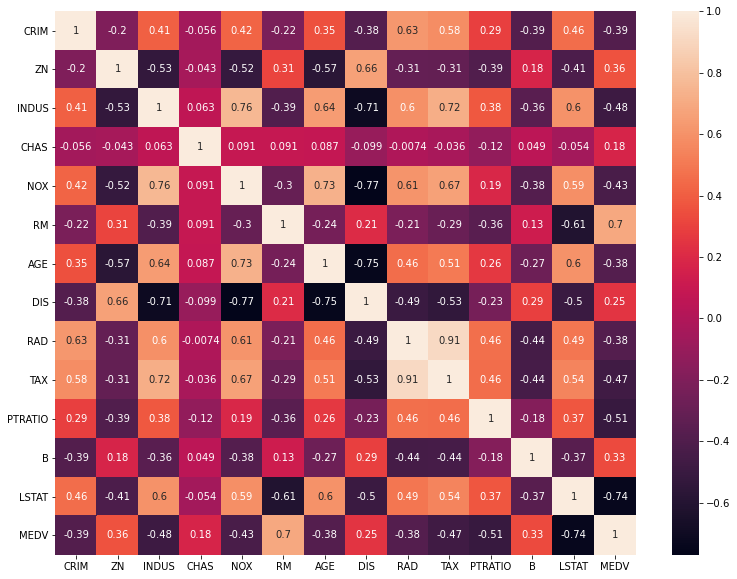

In [81]:
plt.figure(figsize=(13,10))
sns.heatmap(df_boston.corr(), annot=True)

Here we have a heatmap of the correlation values. Since we will be trying to predict housing prices, we are only concerned with features that are highly correlated to the median home value. In the cleaning phase, we will only keep features with an absolute value of correlation greater than 0.5. This means we will drop B, TAX, RAD, DIS, AGE, NOX, CHAS, ZN, and CRIM. 

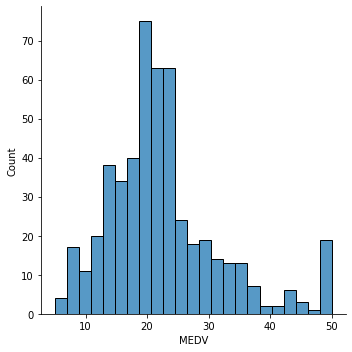

In [82]:
sns.displot(data=df_boston['MEDV'])

As we can see from the histogram, the data has a normal distrobution except for some outliers around the $50k mark. Let's take a closer look.

In [83]:
df_boston[df_boston['MEDV'] == 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


Here we can see there are 16 entries that are exacly $50k. This appears to be innacurate or placeholder data. Since it is a significant outlier, we will remove these points. 

###  Data Cleaning

In [84]:
df_boston = df_boston[df_boston['MEDV'] != 50]

In [87]:
#Drop features
to_drop = ['B', 'TAX', 'RAD', 'DIS', 'AGE', 'NOX', 'CHAS', 'ZN', 'CRIM']
df_boston.drop(columns=to_drop, inplace=True)

Now that we have narrowed down the features, let's take a look at the pairplot.

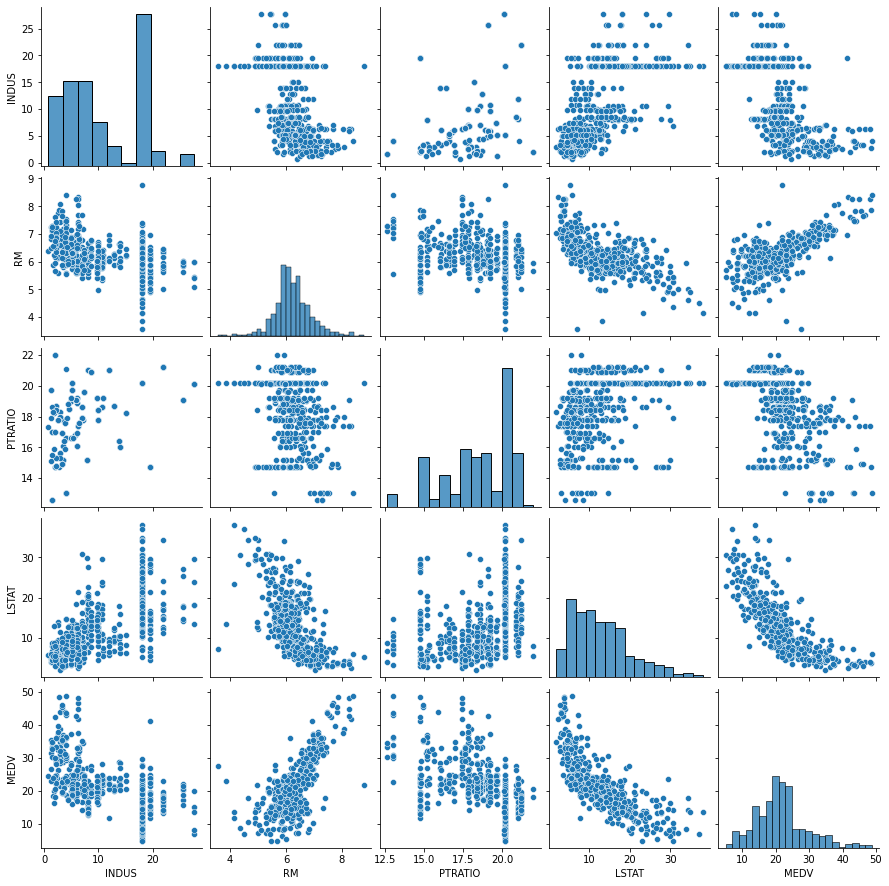

In [89]:
sns.pairplot(data=df_boston)

Here we can see a clear linear relationship between rooms and median price. Now let's look at the heatmap again now that we have removed the other features. 

<AxesSubplot:>

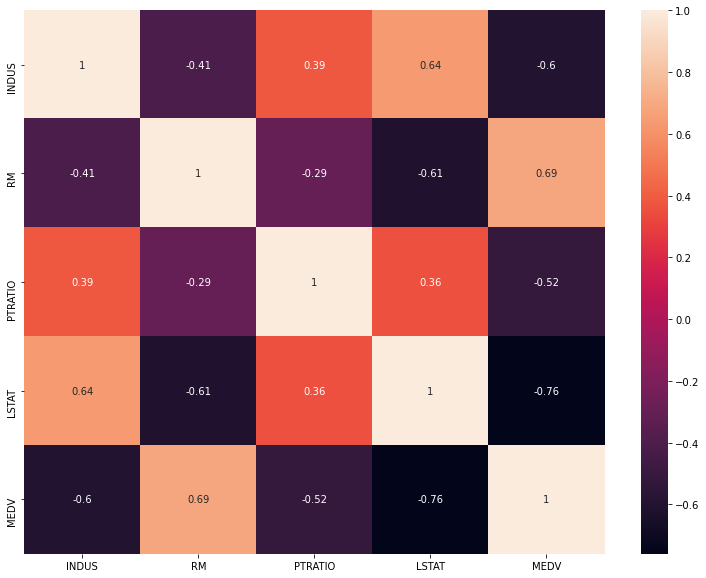

In [90]:
plt.figure(figsize=(13,10))
sns.heatmap(df_boston.corr(), annot=True)

### Linear Regression

In [92]:
df_boston.columns

Index(['INDUS', 'RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [93]:
X = df_boston[['INDUS', 'RM', 'PTRATIO', 'LSTAT']]

In [94]:
y = df_boston['MEDV']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [96]:
#Instantiate Linear Regression Model
lm = LinearRegression()

In [97]:
lm.fit(X_train, y_train)

LinearRegression()

In [98]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [99]:
coef_df

,Coeff
INDUS,-0.116860
RM,3.509653
PTRATIO,-0.948801
LSTAT,-0.472151


### Preditctions

In [100]:
predictions = lm.predict(X_test)

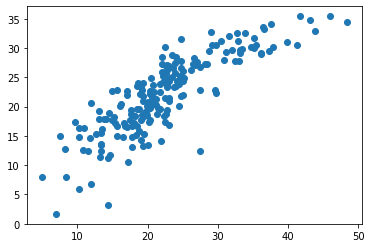

In [104]:
plt.scatter(x=y_test, y=predictions)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

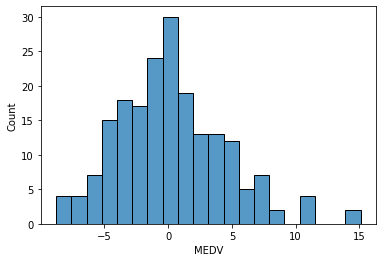

In [109]:
sns.histplot((y_test-predictions), bins=20)

From the histogram of the residuals, we can see it is normally distrobuted. This means linear regression was a good choice for this data.

In [110]:
from sklearn import metrics

In [114]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

4.212334699625423

Based on the RMSE of about \$4200, we start to see a shortcomming of this model. This deviation represents 18.7\% of the mean home price. This is too large to be used to predict real world housing prices. 